In [119]:
# importing
import datetime
import model
import numpy as np
import pandas as pd

In [164]:
# load model data
infile = open('dataset-tr2-597.txt', 'rb')
dataset = np.load(infile)
infile.close()

In [165]:
# creating attributes and targets
X = dataset[:,2:]
y = dataset[:, 1]

In [166]:
# importing relevant libraries for regression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import linear_model

In [167]:
# splitting dataset
n = len(X)
b_train = round(n * 0.75)
b_new = -25
X_train, X_test, X_new = X[0:b_train], X[b_train:b_new], X[b_new:]
y_train, y_test = y[0:b_train], y[b_train:b_new]

In [189]:
gbr = GradientBoostingRegressor(n_estimators=100, 
                                learning_rate=0.3, max_depth=15, random_state=0, 
                                loss='ls').fit(X_train, y_train)
rfr = RandomForestRegressor(n_estimators = 90).fit(X_train, y_train)
lr = linear_model.LinearRegression().fit(X_train, y_train)

In [190]:
mean_squared_error(y_test, gbr.predict(X_test))    

31765.877213641856

In [191]:
mean_squared_error(y_test, lr.predict(X_test))

24907.199549727506

In [192]:
mean_squared_error(y_test, rfr.predict(X_test))

23192.313079179152

In [193]:
gbr_test = gbr.predict(X_test)
lr_test = lr.predict(X_test)
rfr_test = rfr.predict(X_test)

In [172]:
%matplotlib inline  
import matplotlib.pyplot as plt

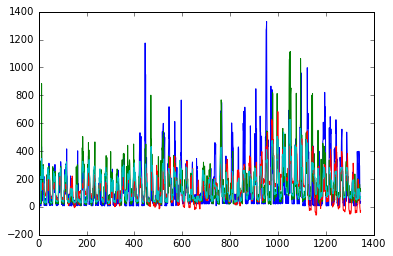

In [194]:
plt.plot(y_test)
plt.plot(gbr_test)
plt.plot(lr_test)
plt.plot(rfr_test)


In [195]:
# add hour into the dataset
a = dataset[:,0]
f = lambda x: int(x[11:13])
hours = list(map(f, a))
dataset2 = np.c_[dataset, hours]

In [196]:
# creating attributes and targets
X = dataset2[:,2:]
y = dataset2[:, 1]
# splitting dataset
n = len(X)
b_train = round(n * 0.75)
b_new = -25
X_train, X_test, X_new = X[0:b_train], X[b_train:b_new], X[b_new:]
y_train, y_test = y[0:b_train], y[b_train:b_new]

In [203]:
gbr = GradientBoostingRegressor(n_estimators=100, 
                                learning_rate=0.3, max_depth=15, random_state=1, 
                                loss='ls').fit(X_train, y_train)
rfr = RandomForestRegressor(n_estimators = 190).fit(X_train, y_train)
lr = linear_model.LinearRegression().fit(X_train, y_train)

In [204]:
mean_squared_error(y_test, gbr.predict(X_test)) 

32845.449073794036

In [205]:
mean_squared_error(y_test, lr.predict(X_test))

24907.199549727506

In [206]:
mean_squared_error(y_test, rfr.predict(X_test))

23570.735936121513

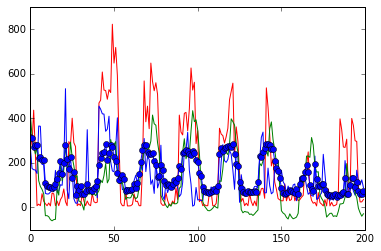

In [207]:
gbr_test = gbr.predict(X_test)
lr_test = lr.predict(X_test)
plt.plot(y_test[-200:], 'r-')
plt.plot(gbr_test[-200:], 'b-')
plt.plot(lr_test[-200:], 'g-')
plt.plot(rfr_test[-200:], 'o-')